# Data Preprocessing

### Load libraries and dataset

In [ ]:
#load libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
car_data = pd.read_csv('Cardetails.csv')

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,190Nm@ 2000rpm,5.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,250Nm@ 1500-2500rpm,5.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,"12.7@ 2,700(kgm@ rpm)",5.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,22.4 kgm at 1750-2750rpm,5.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,"11.5@ 4,500(kgm@ rpm)",5.0,88.20


In [ ]:
# Torque is not necessary
car_data.drop('torque', axis=1, inplace=True)

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0,88.20


### Identify missing values

In [ ]:
car_data.shape

(8128, 12)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  seats          7907 non-null   float64
 11  max_power      7906 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 762.1+ KB


In [ ]:
car_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
car_data.describe()

,year,selling_price,km_driven,seats,max_power
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7906.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719,91.587378
std,4.044249,8.062534e+05,5.655055e+04,0.959588,35.747218
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,32.800000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,82.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,400.000000


In [ ]:
car_data.dropna(inplace=True)

In [ ]:
car_data.duplicated().sum()

1189

In [ ]:
car_data.drop_duplicates(inplace=True)

In [ ]:
car_data.shape

(6717, 12)

### Text removal from numerical columns

In [ ]:
for col in car_data.columns:
    print(col)
    print(car_data[col].unique())

name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   5650

In [ ]:
def get_car_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')

In [ ]:
get_car_name('Skoda Rapid 1.5 TDI Ambition')

'Skoda'

In [ ]:
car_data['name'] = car_data['name'].apply(get_car_name)

In [ ]:
def get_value(value):
    return value.split(' ')[0]

In [ ]:
car_data['mileage'] = car_data['mileage'].apply(get_value)

In [ ]:
car_data['engine'] = car_data['engine'].apply(get_value)

In [ ]:
cat = 'mileage', 'engine'
for i in cat:
  car_data[i] = car_data[i].astype(float)

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,max_power
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0,88.20


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  seats          6717 non-null   float64
 11  max_power      6717 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.2+ KB


# Outliers

<Axes: ylabel='selling_price'>

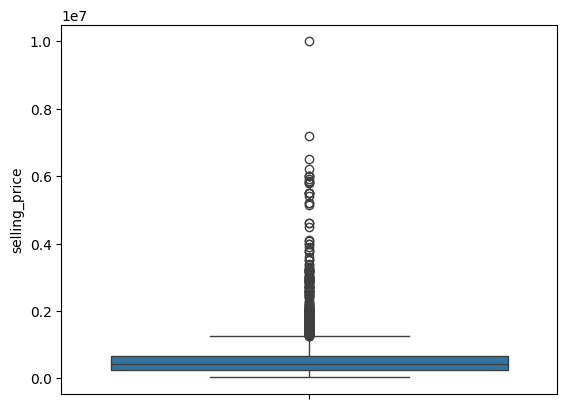

In [ ]:
import seaborn as sns
sns.boxplot(car_data.selling_price)

In [ ]:
sorted(car_data.selling_price, reverse = True)

[10000000,
 7200000,
 6523000,
 6223000,
 6000000,
 6000000,
 6000000,
 5923000,
 5850000,
 5830000,
 5800000,
 5800000,
 5500000,
 5500000,
 5500000,
 5500000,
 5400000,
 5200000,
 5200000,
 5150000,
 4600000,
 4600000,
 4500000,
 4100000,
 4090000,
 4000000,
 3975000,
 3900000,
 3800000,
 3790000,
 3750000,
 3600000,
 3500000,
 3500000,
 3400000,
 3350000,
 3300000,
 3251000,
 3250000,
 3250000,
 3200000,
 3200000,
 3200000,
 3200000,
 3200000,
 3200000,
 3200000,
 3100000,
 3100000,
 3000000,
 3000000,
 3000000,
 3000000,
 3000000,
 2950000,
 2950000,
 2950000,
 2950000,
 2940000,
 2900000,
 2900000,
 2900000,
 2900000,
 2900000,
 2850000,
 2825000,
 2800000,
 2800000,
 2750000,
 2711000,
 2700000,
 2700000,
 2700000,
 2700000,
 2700000,
 2650000,
 2625000,
 2600000,
 2600000,
 2600000,
 2600000,
 2575000,
 2550000,
 2500000,
 2500000,
 2500000,
 2475000,
 2450000,
 2450000,
 2400000,
 2375000,
 2300000,
 2280000,
 2200000,
 2200000,
 2199000,
 2175000,
 2150000,
 2150000,
 2125000,

In [ ]:
car_data = car_data[~(car_data.selling_price>6000000)]

# Encoding

In [ ]:
s = (car_data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [ ]:
car_data.owner.value_counts()

,count
owner,
First Owner,4174
Second Owner,1888
Third Owner,493
Fourth & Above Owner,155
Test Drive Car,3


In [ ]:
car_data.transmission.value_counts()

,count
transmission,
Manual,6142
Automatic,571


In [ ]:
car_data.seller_type.value_counts()

,count
seller_type,
Individual,6022
Dealer,664
Trustmark Dealer,27


In [ ]:
car_data.fuel.value_counts()

,count
fuel,
Diesel,3657
Petrol,2970
CNG,51
LPG,35


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
car_data['transmission'] = label_encoder.fit_transform(car_data['transmission'])

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
col='name', 'fuel', 'seller_type', 'owner'
te = TargetEncoder()
for col in col:
  car_data[col] = te.fit_transform(car_data[col], car_data['selling_price'])

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,max_power
0,393974.543801,2014,450000,145500,646204.477987,477465.589007,1,616687.940585,23.40,1248.0,5.0,74.00
1,593685.315059,2014,370000,120000,646204.477987,477465.589007,1,393886.267479,21.14,1498.0,5.0,103.52
2,574460.207756,2006,158000,140000,376780.124242,477465.589007,1,289751.547667,17.70,1497.0,5.0,78.00
3,466601.687809,2010,225000,127000,646204.477987,477465.589007,1,616687.940585,23.00,1396.0,5.0,90.00
4,393974.543801,2007,130000,120000,376780.124242,477465.589007,1,616687.940585,16.10,1298.0,5.0,88.20


# Standardisation

In [ ]:
input = car_data.drop('selling_price', axis=1)
output = car_data['selling_price']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
input = pd.DataFrame(ss.fit_transform(input),columns = input.columns)

# Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, train_size=0.8, random_state=100)

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# building the model
lr = LinearRegression()
lr.fit(x_train, y_train)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#accuracy test
lr.score(x_test, y_test)*100

72.60171857418186

In [ ]:
rf.score(x_test, y_test)*100


92.8526321453034

In [ ]:
gbr.score(x_test, y_test)*100


91.29659737692128

In [ ]:
xg.score(x_test, y_test)*100

92.97816157341003

Out of the 4, the best model fit with accuracy of 92.97% is XGBRegressor.

# Prediction

In [ ]:
y_pred = xg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

92.97816157341003

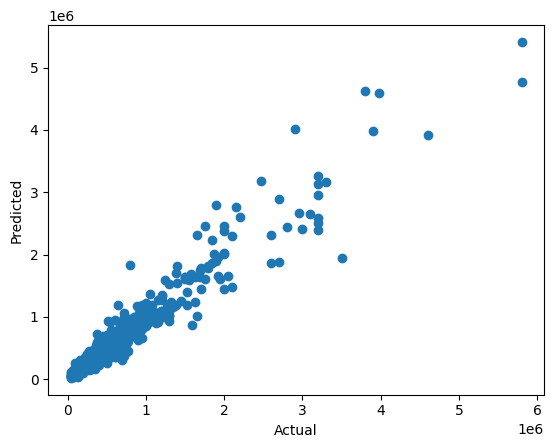

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()